In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [3]:
# To read data and specify column names
df = pd.read_csv("../data/BTC_USDT.csv", names=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])

# To convert the 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')

In [4]:
# Assuming 'Timestamp' column exists and is a datetime type
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day

In [5]:
df=df.set_index('Timestamp')

## EDA

In [6]:
df.describe()

,Open,High,Low,Close,Volume,Year,Month,Day
count,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000
mean,27875.841779,28549.004272,27160.852343,27910.078339,67612.236430,2020.848185,6.642831,15.770077
std,23298.001772,23808.608751,22783.862927,23331.716535,79784.011860,2.174280,3.504746,8.812360
min,3188.010000,3276.500000,2817.000000,3189.020000,228.108068,2017.000000,1.000000,1.000000
25%,8578.580000,8800.475000,8278.500000,8607.215000,27819.883650,2019.000000,4.000000,8.000000
50%,20482.810000,21020.000000,20031.240000,20490.740000,43415.663240,2021.000000,7.000000,16.000000
75%,42571.880000,43434.390000,41646.065000,42581.440000,70667.334070,2023.000000,10.000000,23.000000
max,106143.820000,109588.000000,105321.490000,106143.820000,760705.362783,2025.000000,12.000000,31.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2727 entries, 2017-08-17 to 2025-02-02
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2727 non-null   float64
 1   High    2727 non-null   float64
 2   Low     2727 non-null   float64
 3   Close   2727 non-null   float64
 4   Volume  2727 non-null   float64
 5   Year    2727 non-null   int32  
 6   Month   2727 non-null   int32  
 7   Day     2727 non-null   int32  
dtypes: float64(5), int32(3)
memory usage: 159.8 KB


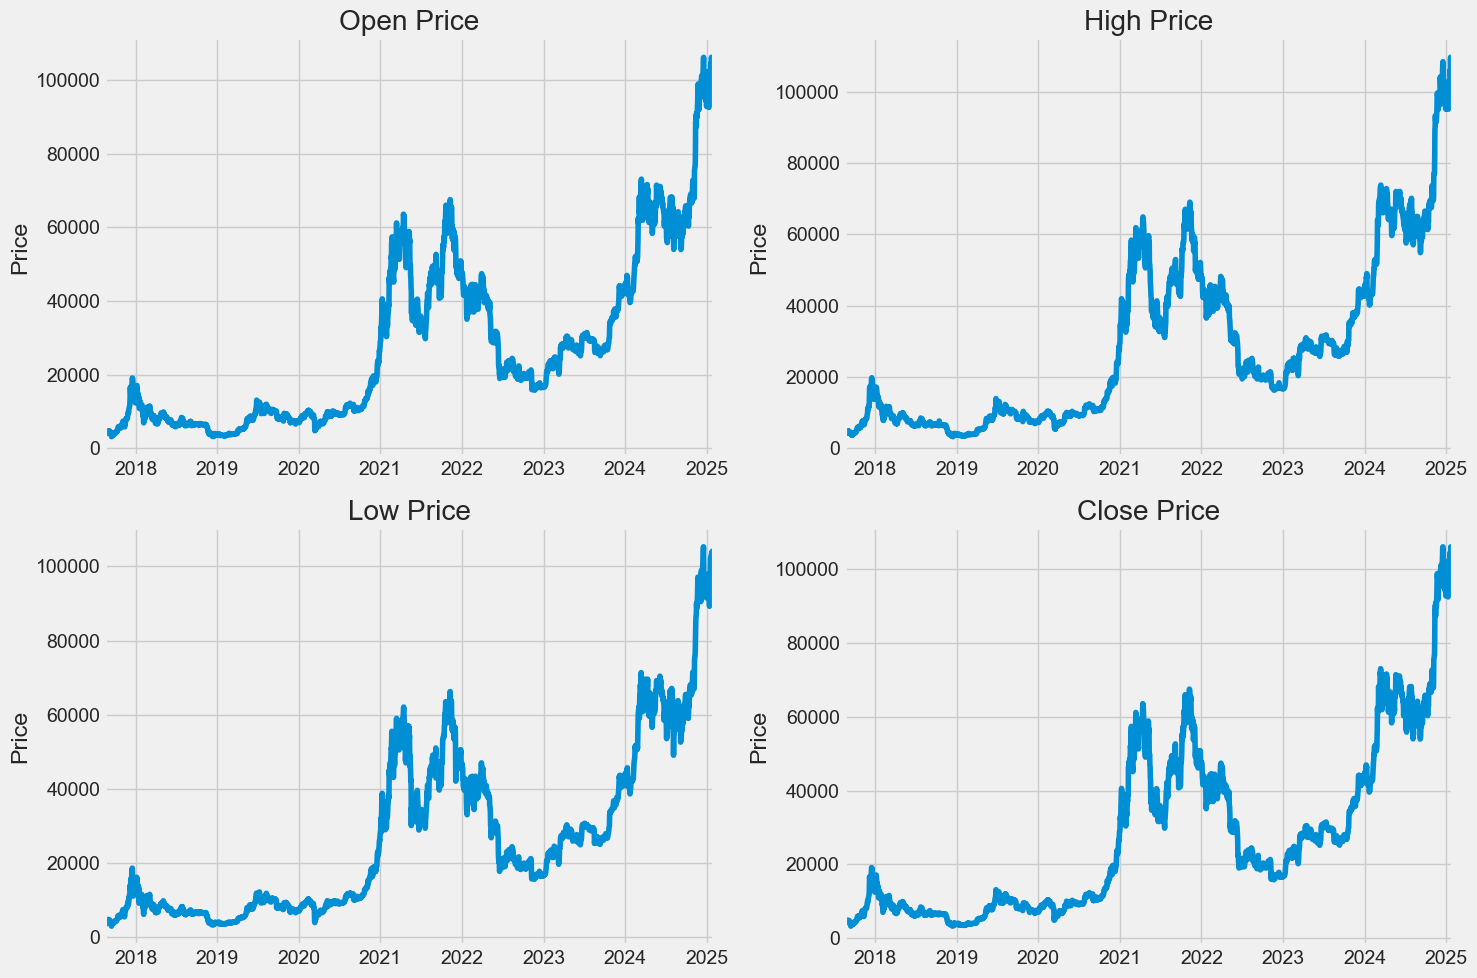

In [9]:
# Create a figure for the plots
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# List of columns to plot
columns = ['Open', 'High', 'Low', 'Close']

# Loop through the columns and create subplots
for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)  # Creates a 2x2 grid of subplots
    df[column].plot()      # Plot the current column (no need to double bracket for single column)
    plt.title(f"{column} Price")
    plt.ylabel('Price')
    plt.xlabel(None)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

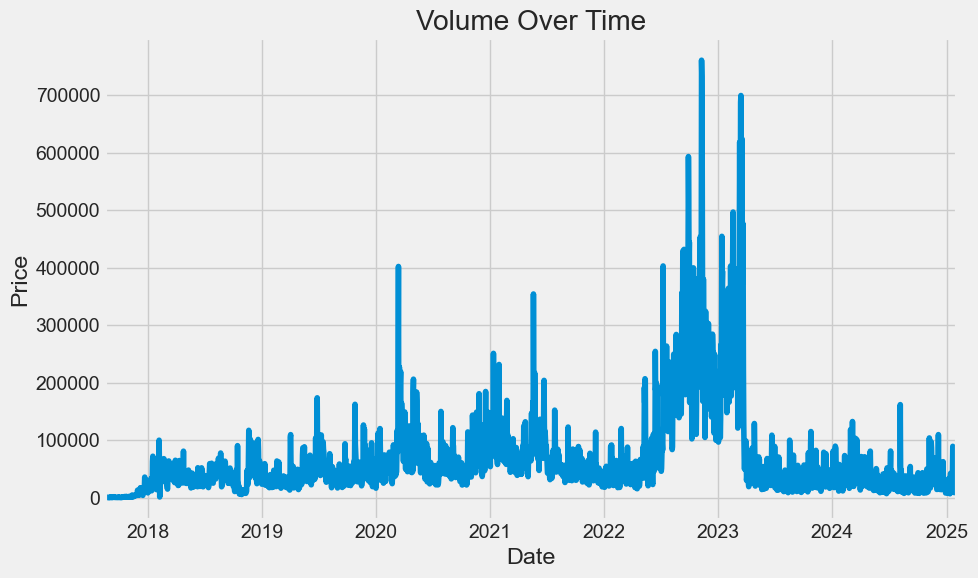

In [10]:
plt.figure(figsize=(10, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

df['Volume'].plot()      # Plot the current column (no need to double bracket for single column)
plt.title("Volume Over Time")
plt.ylabel('Price')
plt.xlabel('Date')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

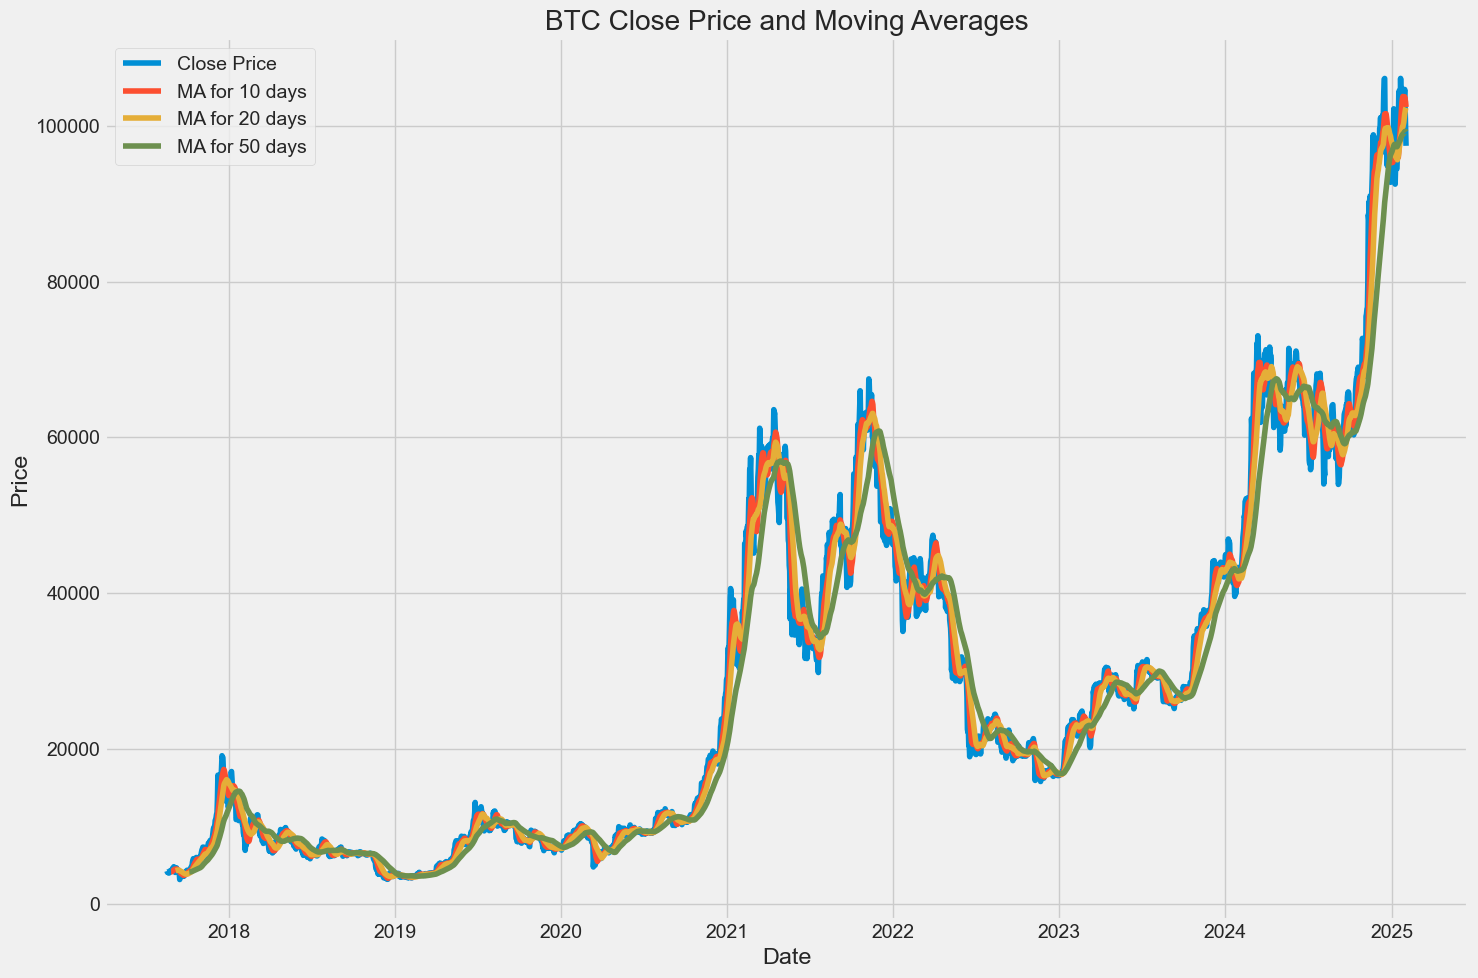

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

ma_day = [10, 20, 50]

fig = plt.figure(figsize=(15, 10))
plt.plot(df['Close'], label='Close Price')

for ma in ma_day:
    ma_label = f"MA for {ma} days"
    plt.plot(df['Close'].rolling(ma).mean(), label=ma_label)  # Plot rolling mean

plt.title('BTC Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')

plt.legend()
fig.tight_layout()
plt.show()

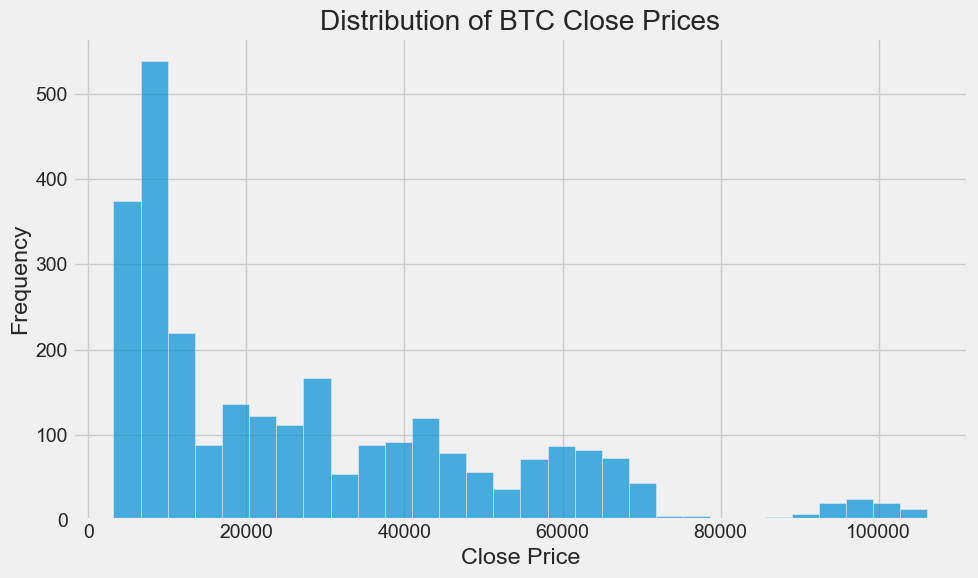

In [12]:
plt.figure(figsize=(10, 6))

plt.hist(df['Close'], bins=30, alpha=0.7)

plt.title('Distribution of BTC Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

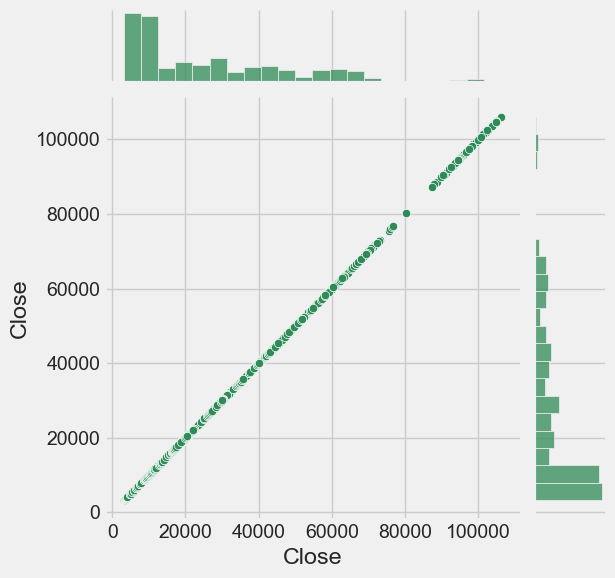

In [13]:
sns.jointplot(x='Close', y='Close', data=df, kind='scatter', color='seagreen')

Text(0.5, 1.0, 'Correlation of BTC/USDT')

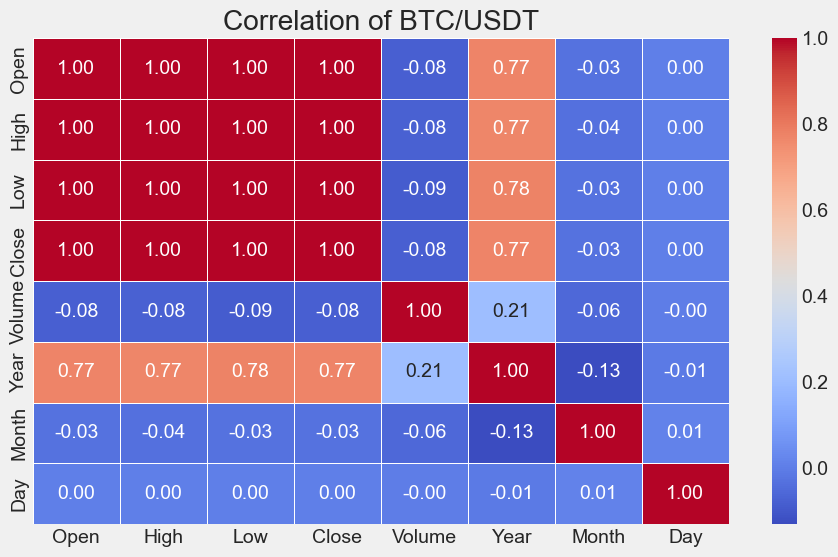

In [14]:
plt.figure(figsize=(10, 6))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation of BTC/USDT')

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [16]:
df.head()

,Open,High,Low,Close,Volume,Year,Month,Day
Timestamp,,,,,,,,
2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,2017,8,17
2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,2017,8,18
2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,2017,8,19
2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,2017,8,20
2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,2017,8,21


In [17]:
X = df.drop(['Close','Year','Month','Day'], axis=1)
y = df['Close']

In [18]:
scaler = StandardScaler()

In [19]:
# Define split point (for example, 80% train, 20% test)
split_point = int(len(df) * 0.80)

# Split the data
train_data = df[:split_point]
test_data = df[split_point:]

In [20]:
# Train-Test Split (time-based split: past for training, future for testing)
train_size = int(len(df) * 0.8)  # 80% training, 20% testing
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [21]:
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)  # Only transform test data (use fit_transform on training data to avoid data leakage)
    

In [22]:
X_train_scaled.shape, X_test_scaled.shape

((2181, 4), (546, 4))

In [23]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [24]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Support Vector Machine": SVR(),
    "Random Forest Regressor": RandomForestRegressor()
   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled) 
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

f:\CryptoVertex\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
f:\CryptoVertex\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
f:\CryptoVertex\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.097e+08, tolerance: 5.611e+07
  model = cd_fast.enet_coordinate_descent(
f:\CryptoVertex\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
f:\CryptoVertex\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitte

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 25700.5111
- Mean Absolute Error: 20081.6102
- R2 Score: -1.5673
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 62948.7608
- Mean Absolute Error: 59053.3249
- R2 Score: -7.3368


Lasso
Model performance for Training set
- Root Mean Squared Error: 25697.4805
- Mean Absolute Error: 20077.7300
- R2 Score: -1.5667
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 62945.1300
- Mean Absolute Error: 59049.4531
- R2 Score: -7.3358


Ridge
Model performance for Training set
- Root Mean Squared Error: 25700.5111
- Mean Absolute Error: 20081.6102
- R2 Score: -1.5673
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 62948.7608
- Mean Absolute Error: 59053.3249
- R2 Score: -7.3368




f:\CryptoVertex\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
f:\CryptoVertex\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


Support Vector Machine
Model performance for Training set
- Root Mean Squared Error: 18158.6057
- Mean Absolute Error: 12547.2298
- R2 Score: -0.2816
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 52251.9180
- Mean Absolute Error: 47486.3447
- R2 Score: -4.7442


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 23257.9522
- Mean Absolute Error: 16842.2559
- R2 Score: -1.1025
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 59922.9343
- Mean Absolute Error: 55816.1968
- R2 Score: -6.5546




f:\CryptoVertex\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
f:\CryptoVertex\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Without Standard Scaler

In [25]:
X = df.drop(['Close','Year','Month','Day'], axis=1)
y = df['Close']

In [26]:
# Define split point (for example, 80% train, 20% test)
split_point = int(len(df) * 0.80)

# Split the data
train_data = df[:split_point]
test_data = df[split_point:]

In [27]:
# Train-Test Split (time-based split: past for training, future for testing)
train_size = int(len(df) * 0.8)  # 80% training, 20% testing
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [28]:
X_train

,Open,High,Low,Volume
Timestamp,,,,
2017-08-17,4261.48,4485.39,4200.74,795.150377
2017-08-18,4285.08,4371.52,3938.77,1199.888264
2017-08-19,4108.37,4184.69,3850.00,381.309763
2017-08-20,4120.98,4211.08,4032.62,467.083022
2017-08-21,4069.13,4119.62,3911.79,691.743060
...,...,...,...,...
2023-08-02,29705.99,30047.50,28927.50,48181.651410
2023-08-03,29186.00,29433.33,28968.00,26476.919940
2023-08-04,29193.65,29333.08,28807.54,23551.952170


In [29]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Support Vector Machine": SVR(),
    "Random Forest Regressor": RandomForestRegressor()
   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test) 
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 406.5720
- Mean Absolute Error: 226.5983
- R2 Score: 0.9994
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 643.0734
- Mean Absolute Error: 442.3269
- R2 Score: 0.9991


Lasso
Model performance for Training set
- Root Mean Squared Error: 438.5234
- Mean Absolute Error: 255.4564
- R2 Score: 0.9993
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 701.5517
- Mean Absolute Error: 507.3895
- R2 Score: 0.9990


Ridge
Model performance for Training set
- Root Mean Squared Error: 406.5720
- Mean Absolute Error: 226.5983
- R2 Score: 0.9994
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 643.0734
- Mean Absolute Error: 442.3269
- R2 Score: 0.9991




f:\CryptoVertex\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.097e+08, tolerance: 5.611e+07
  model = cd_fast.enet_coordinate_descent(


Support Vector Machine
Model performance for Training set
- Root Mean Squared Error: 17858.1304
- Mean Absolute Error: 12348.9646
- R2 Score: -0.2396
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 51707.9162
- Mean Absolute Error: 46939.9551
- R2 Score: -4.6252


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 198.7296
- Mean Absolute Error: 109.4432
- R2 Score: 0.9998
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 12625.9994
- Mean Absolute Error: 5716.6334
- R2 Score: 0.6646




### With Hyperparameter

In [30]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]
}

svr_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.01, 0.1, 0.5],
    'degree': [2, 3]
}

In [31]:
# Models list for Hyperparameter tuning
randomcv_models = [('KNN', SVR(), svr_params),
                   ("RF", RandomForestRegressor(), rf_params)]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:98
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
## Retraining the models with best parameters
models = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, min_samples_split=2, max_features='auto', max_depth=None, 
                                                     n_jobs=-1),
     "Support Vector Regressor": SVR(n_neighbors=10, n_jobs=-1)
    
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')